In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import cv2

In [3]:
from sklearn.utils import shuffle

In [4]:
import os

In [5]:
classes = ['buildings','forest','glacier','mountain','sea','street']

In [6]:
class_label = {classes:i for i, classes in enumerate(classes)}

In [7]:
class_label

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [8]:
n_classes = len(classes)

In [9]:
def load_data():
    dataset = ['dataset\seg_train\seg_train', 'dataset\seg_test\seg_test']
    output = []
    
    for dataset in dataset:
        images=[]
        labels=[]
        
        for folder in os.listdir(dataset):
            label = class_label[folder]
            for file in os.listdir(os.path.join(dataset,folder)):
                image_path = os.path.join(os.path.join(dataset,folder),file)
                img = cv2.imread(image_path)
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                img = cv2.resize(img,(150,150))
                
                images.append(img)
                labels.append(label)
                
        images = np.array(images, dtype='float32')
        labels = np.array(labels, dtype = 'int32')
        output.append((images,labels))
        
    return output


In [10]:
(train_img,train_labels),(test_img, test_labels) = load_data()

In [11]:
train_img

array([[[[ 99., 132., 186.],
         [ 97., 130., 184.],
         [ 97., 130., 184.],
         ...,
         [114., 144., 196.],
         [110., 140., 192.],
         [108., 138., 190.]],

        [[ 98., 131., 185.],
         [ 98., 131., 185.],
         [100., 133., 187.],
         ...,
         [122., 150., 198.],
         [119., 147., 197.],
         [116., 144., 194.]],

        [[ 99., 132., 186.],
         [ 99., 132., 186.],
         [101., 134., 188.],
         ...,
         [125., 149., 197.],
         [122., 146., 194.],
         [118., 145., 192.]],

        ...,

        [[122., 125., 116.],
         [119., 122., 115.],
         [119., 121., 116.],
         ...,
         [149., 144., 140.],
         [149., 144., 140.],
         [148., 143., 139.]],

        [[119., 119., 107.],
         [112., 112., 102.],
         [108., 107., 102.],
         ...,
         [150., 145., 141.],
         [153., 148., 144.],
         [156., 151., 147.]],

        [[157., 150., 140.],
       

In [12]:
train_img, train_labels = shuffle(train_img, train_labels, random_state=25)

In [13]:
train_img = train_img / 255.0


In [34]:
test_img = test_img / 255.0

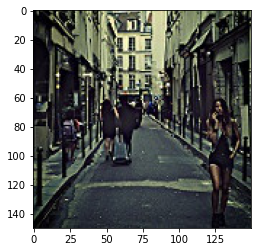

In [14]:
plt.imshow(train_img[1])

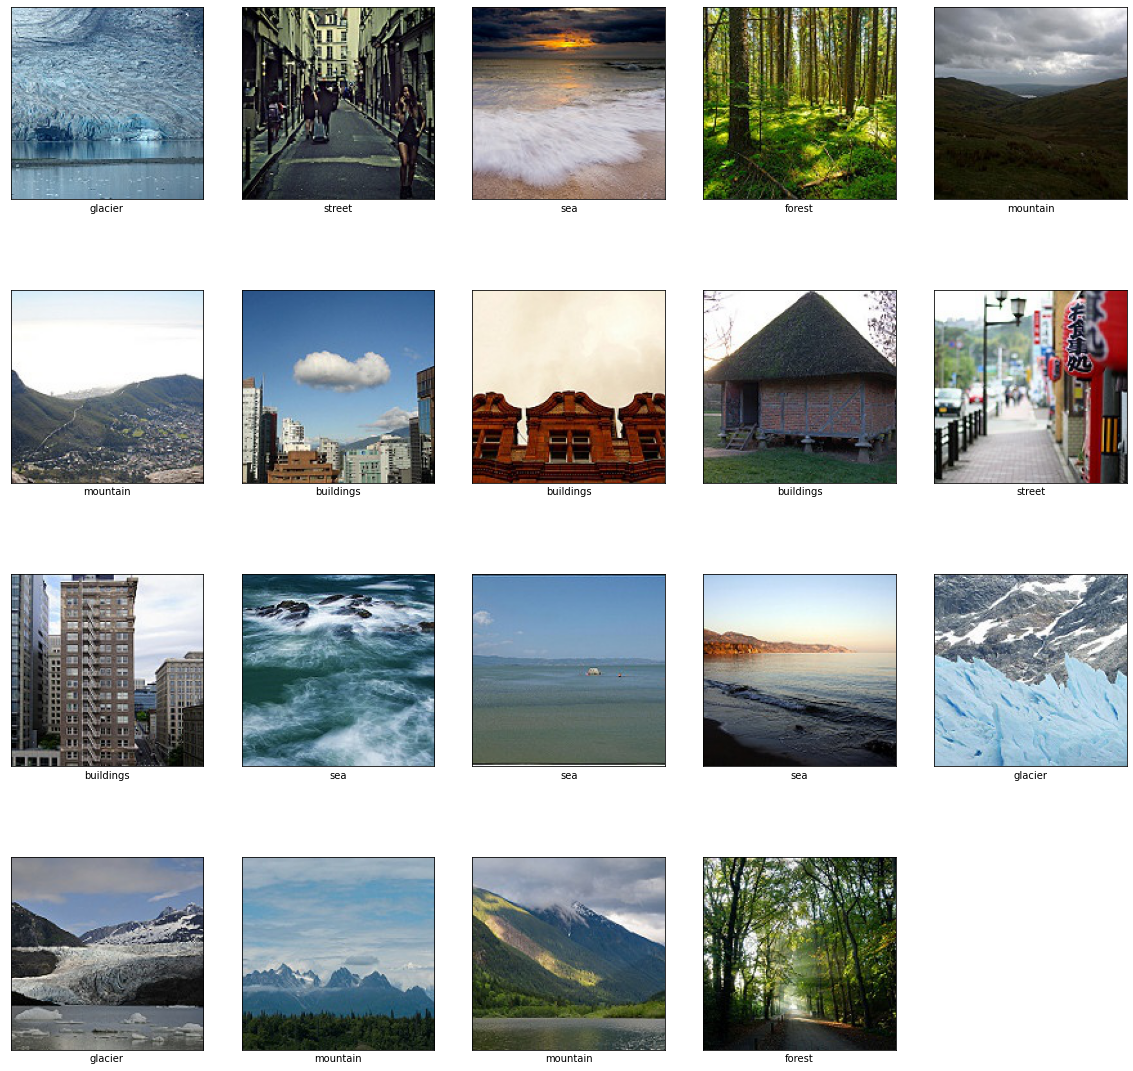

In [15]:
plt.figure(figsize = (20,20))
for i in range(1,20):
    plt.subplot(4,5,i)
    fig = plt.gca()
    fig = plt.imshow(train_img[i-1])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(classes[train_labels[i-1]])

In [16]:
import tensorflow as tf

In [17]:
model = tf.keras.Sequential()

In [18]:
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))

In [19]:
model.add(tf.keras.layers.MaxPooling2D(2,2))

In [20]:
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu'))

In [21]:
model.add(tf.keras.layers.MaxPooling2D(2,2))


In [22]:
model.add(tf.keras.layers.Dropout(0.25))

In [23]:
model.add(tf.keras.layers.Flatten())

In [24]:
model.add(tf.keras.layers.Dense(128, activation='relu'))

In [25]:
model.add(tf.keras.layers.Dense(6,activation='softmax'))

In [26]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.fit(train_img, train_labels, batch_size=128, epochs=50, validation_split = 0.2)

Train on 11222 samples, validate on 2806 samples
Epoch 1/50
11222/11222 [==============================] - 13s 1ms/sample - loss: 1.1926 - accuracy: 0.5495 - val_loss: 0.9134 - val_accuracy: 0.6639
Epoch 2/50
11222/11222 [==============================] - 9s 789us/sample - loss: 0.7644 - accuracy: 0.7222 - val_loss: 0.7914 - val_accuracy: 0.7185
Epoch 3/50
11222/11222 [==============================] - 9s 829us/sample - loss: 0.5867 - accuracy: 0.7926 - val_loss: 0.7336 - val_accuracy: 0.7537
Epoch 4/50
11222/11222 [==============================] - 9s 797us/sample - loss: 0.4670 - accuracy: 0.8389 - val_loss: 0.7128 - val_accuracy: 0.7484
Epoch 5/50
11222/11222 [==============================] - 9s 791us/sample - loss: 0.3509 - accuracy: 0.8783 - val_loss: 0.6991 - val_accuracy: 0.7701
Epoch 6/50
11222/11222 [==============================] - 9s 800us/sample - loss: 0.2391 - accuracy: 0.9253 - val_loss: 0.6669 - val_accuracy: 0.7826
Epoch 7/50
11222/11222 [============================

In [28]:
model.evaluate(test_img, test_labels)

3000/3000 [==============================] - 1s 431us/sample - loss: 487.1649 - accuracy: 0.7167


[487.1648577677409, 0.71666664]

In [29]:
pred = model.predict(test_img)

In [30]:
pred

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.915903  , 0.        , 0.        , 0.        , 0.        ,
        0.08409701],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ]], dtype=float32)

In [31]:
pred_labels = np.argmax(pred, axis = 1)

In [32]:
pred_labels

array([0, 0, 0, ..., 3, 0, 5], dtype=int64)

Text(0.5, 0, 'buildings')

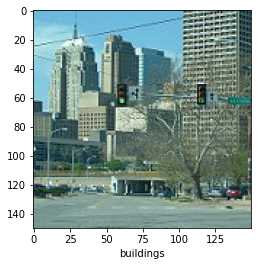

In [35]:
plt.imshow(test_img[1])
plt.xlabel(classes[pred_labels[1]])

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
cm = confusion_matrix(test_labels,pred_labels)

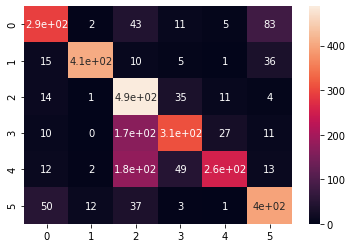

In [39]:
sns.heatmap(cm,annot=True)

In [40]:
class_label

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

The neural network has trouble in distinguishing between buildings and streets and also sea, mountains and glaciers.
Which is understandable. But it is able recognize forests pretty acurately.